### Первое задание

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.datasets import load_boston

%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

In [4]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
x_train_scale = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [10]:
x_train_tsne = tsne.fit_transform(x_train_scale)

In [11]:
x_train_tsne[0:5,:]

array([[ 28.13809  ,  18.375324 ],
       [ -9.785578 ,  -4.5355387],
       [-15.695753 , -17.543627 ],
       [ 37.924854 ,  13.517046 ],
       [ -8.786393 ,   3.9951665]], dtype=float32)

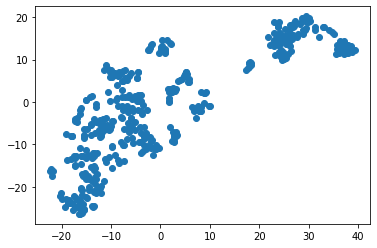

In [12]:
plt.pyplot.scatter(x_train_tsne[:,0], x_train_tsne[:,1])
plt.pyplot.show()

### Второе задание

In [13]:
from sklearn.cluster import KMeans

model = KMeans(max_iter = 100, n_clusters=3, random_state=42)

In [14]:
train = x_train_scale
y_train_scale = pd.DataFrame(scaler.fit_transform(y_train), columns = y_train.columns)
train['y']=pd.DataFrame(y_train_scale)
train_labels = model.fit_predict(train)

In [15]:
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


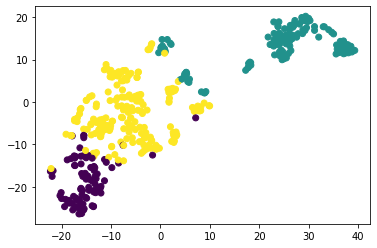

In [16]:
plt.pyplot.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c = train_labels)
plt.pyplot.show()

In [17]:
scaler.inverse_transform(model.cluster_centers_)

array([[19.07687734, 37.21127813, 13.26313256, 21.88405151, 12.4609282 ,
        27.2900673 , 10.39875539, 36.02424063, 17.24242352, 17.27217447,
        17.15954742, 26.12257325, 14.96885027, 27.93837209],
       [30.26861171, 18.13325578, 33.35260654, 23.58976103, 33.43059308,
        18.21584437, 30.08046181, 14.79562947, 34.2412142 , 34.94752165,
        28.47404664, 16.75020842, 31.1516134 , 16.1796875 ],
       [19.44634868, 19.4135439 , 20.00019454, 22.67516925, 20.31075927,
        23.84855859, 23.50109434, 22.1993407 , 17.60040084, 17.11110645,
        21.52316291, 25.36437907, 20.71090716, 24.92684211]])

In [18]:
# Средние цены в кластерах
price_train = scaler.inverse_transform(model.cluster_centers_)[:,13]
res_train = pd.DataFrame(price_train,  columns = ['Price'])
res_train

,Price
0,27.938372
1,16.179688
2,24.926842


In [19]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
# Средний CRIM в кластерах
CRIM_train = scaler.inverse_transform(model.cluster_centers_)[:,0]
res_train['CRIM'] = pd.DataFrame(CRIM_train, columns = ['CRIM'])

In [22]:
res_train

,Price,CRIM
0,27.938372,19.076877
1,16.179688,30.268612
2,24.926842,19.446349


### Третье задание

In [23]:
x_test_scale = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)
y_test_scale = pd.DataFrame(scaler.fit_transform(y_test), columns = y_test.columns)
test = x_test_scale
test['y']=y_test_scale
test_labels = model.predict(test)

In [27]:
# Средние цены в кластерах
price_test = scaler.inverse_transform(model.cluster_centers_)[:,13]
res_test = pd.DataFrame(price_test, columns = ['Price_test'])

In [29]:
# Средний CRIM в кластерах
CRIM_test = scaler.inverse_transform(model.cluster_centers_)[:,0]
res_test['CRIM_test'] = pd.DataFrame(CRIM_test, columns = ['Price_test'])
res_test

,Price_test,CRIM_test
0,26.212421,18.070711
1,15.408849,28.353384
2,23.445506,18.410172


Сравнение

In [30]:
res_train, res_test

(       Price       CRIM
 0  27.938372  19.076877
 1  16.179688  30.268612
 2  24.926842  19.446349,
    Price_test  CRIM_test
 0   26.212421  18.070711
 1   15.408849  28.353384
 2   23.445506  18.410172)